In [1]:
import numpy as np

np.random.seed(0)

In [2]:
A = np.random.uniform(0,1)
B = np.random.uniform(0.8,1.2)
C = np.random.uniform(0,1)
D = np.random.uniform(0.3,0.7)
X0 = np.random.normal(0,0.8)

print("Valor de A = {}\nValor de B = {}\nValor de C = {}\nValor de D = {}\nPosición inicial = {}".format(A,B,C,D,X0))

Valor de A = 0.5488135039273248
Valor de B = 1.0860757465489677
Valor de C = 0.6027633760716439
Valor de D = 0.5179532731987587
Posición inicial = 1.494046392119974


In [3]:
n_samples = 200

V = np.random.normal(0,1,n_samples)
W = np.random.normal(0,1,n_samples)

X = np.zeros(n_samples)
Y = np.zeros(n_samples)
X[0] = X0
for i in range(n_samples):
    try:
        X[i+1] = A*X[i] + B * V[i]
    except IndexError:
        pass
    Y[i] = C*X[i] + D*W[i]

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_series(series,y_tag,colour='tab:blue'):
    fig, ax = plt.subplots()
    sns.set_theme(style="whitegrid")
    plot = sns.lineplot(data=series, ax=ax, markers=['o','o','o'], color=colour)
    ax.set(xlabel='tiempo',ylabel=y_tag,title='Realizaciones de la serie {}'.format(y_tag))
    plt.show()

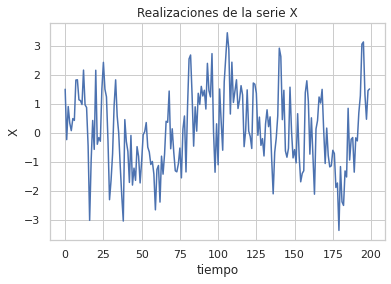

In [11]:
plot_series(X,'X')

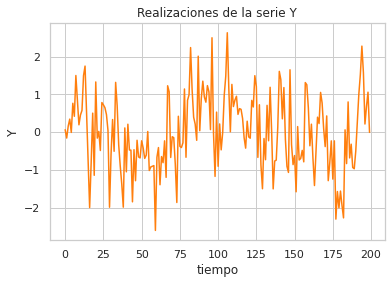

In [15]:
plot_series(Y,'Y','tab:orange')

In [ ]:
class KalmanFilter1D:
    def __init__(self,x0,P0,F_model,Q_model,H_model):
        """Inicializa la clase con listas vacías de observación, predicción y corrección
        
        Argumentos
        ----------
        
            x0: float
                estado inicial
                
            P0: float
                varianza inicial
                
            F_model: float
                factor que multiplica x_{n-1} en x_n

            Q_model: float
                covarianza del ruido de la ecuación de estado
                
            H_model: float
                factor que multuplica x_n en y_n
        """
        self._x_observed = [x0]
        # self.x_true = []
        self._x_predicted = []
        self._x_updated = []

        self._variances = [P0]

        self.F = F_model
        self.Q = Q_model
        self.H = H_model

    def predict(self):
        x_pred = self.F * self.x_observed[-1]
        self.x_predicted.append(x_pred)
        P_pred = (self.F**2) * self._variances[-1] + self.Q**2  # o self.Q ???
        self._variances.append(P_pred)

    def observe(self,x_obs):
        self._x_observed.append(x_obs)

    def update(self):
        raise NotImplementedError

    def x_predicted(self):
        return np.array(self._x_predicted)

    def x_updated(self):
        return np.array(self._x_updated)